# Import Libraries:

In [120]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

# Loading the Data:

In [121]:
df = pd.read_csv('data/final_data.csv')

In [122]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000,32.000,104,0.000,0.000,0.010,...,1.217,0.335,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000,30.000,15,0.000,0.000,0.069,...,1.242,0.207,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000,37.000,4,0.000,0.000,0.000,...,0.616,0.925,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000,25.000,82,0.028,0.056,0.225,...,0.000,0.000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000,30.000,63,0.018,0.018,0.054,...,0.000,0.000,5031,238,51,21,40000000,80000000,2,0


# Data Preprocessing:

In [123]:
temp = df[['goals', 'assists', 'clean sheets', 'goals conceded', 'yellow cards', 'second yellow cards', 'red cards', 'minutes played']].copy()
temp.iloc[:, :-1] = temp.iloc[:, :-1].apply(lambda x: x * (temp['minutes played'] / 90))
temp.head()

,goals,assists,clean sheets,goals conceded,yellow cards,second yellow cards,red cards,minutes played
0,0.000,0.000,35.000,127.000,1.000,0.000,0.000,9390
1,0.000,0.000,3.000,18.000,1.000,0.000,0.000,1304
2,0.000,0.000,3.000,2.000,0.000,0.000,0.000,292
3,2.000,4.000,0.000,0.000,16.000,0.000,0.000,6408
4,1.000,1.000,0.000,0.000,3.000,0.000,0.000,5031


In [124]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.rename(columns={
    'goals': 'goals_per_90',
    'assists': 'assists_per_90',
    'clean sheets': 'clean_sheets_per_90',
    'goals conceded': 'goals_conceded_per_90',
    'yellow cards': 'yellow_cards_per_90',
    'second yellow cards': 'second_yellow_cards_per_90',
    'red cards': 'red_cards_per_90',
    'minutes played': 'minutes_played_per_90'
}, inplace=True)
df.head()

,player,team,name,position,height,age,appearance,goals_per_90,assists_per_90,yellow_cards_per_90,...,goals_conceded_per_90,clean_sheets_per_90,minutes_played_per_90,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000,32.000,104,0.000,0.000,0.010,...,1.217,0.335,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000,30.000,15,0.000,0.000,0.069,...,1.242,0.207,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000,37.000,4,0.000,0.000,0.000,...,0.616,0.925,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000,25.000,82,0.028,0.056,0.225,...,0.000,0.000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000,30.000,63,0.018,0.018,0.054,...,0.000,0.000,5031,238,51,21,40000000,80000000,2,0


In [125]:
df = pd.concat([df, temp], axis=1)
df.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90',
                     'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 
                     'minutes played', 'position_encoded' ],axis=1, inplace=True)
df = df.loc[:,~df.columns.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   days_injured         10754 non-null  int64  
 8   games_injured        10754 non-null  int64  
 9   award                10754 non-null  int64  
 10  current_value        10754 non-null  int64  
 11  highest_value        10754 non-null  int64  
 12  goals                10754 non-null  float64
 13  assists              10754 non-null  float64
 14  clean sheets         10754 non-null  float64
 15  goals conceded       10754 non-null 

In [126]:
df['position'] = df['position'].apply(lambda x: x.split('-')[0]).apply(lambda x: x.split(' ')[0])
df['position'].unique()

array(['Goalkeeper', 'Defender', 'midfield', 'Attack'], dtype=object)

In [127]:
df.drop(['player', 'name'], axis=1, inplace=True)

In [128]:
df['team'].value_counts()

Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: team, Length: 374, dtype: int64

In [129]:
df = df[df['team'] != 'Gaziantep FK']

In [130]:
df.shape

(10748, 17)

# Model Building:

## Feature Engineering:

In [131]:
df = pd.get_dummies(df, columns=['team'])

In [132]:
df.shape

(10748, 389)

In [133]:
df_gk = df[df['position'] == 'Goalkeeper'].drop('position', axis=1)
df_def = df[df['position'] == 'Defender'].drop('position', axis=1)
df_mid = df[df['position'] == 'midfield'].drop('position', axis=1)
df_fwd = df[df['position'] == 'Attack'].drop('position', axis=1)

In [134]:
df_gk.shape, df_def.shape, df_mid.shape, df_fwd.shape

((1228, 388), (3528, 388), (3091, 388), (2901, 388))

Text(0.5, 1.0, 'Forwards')

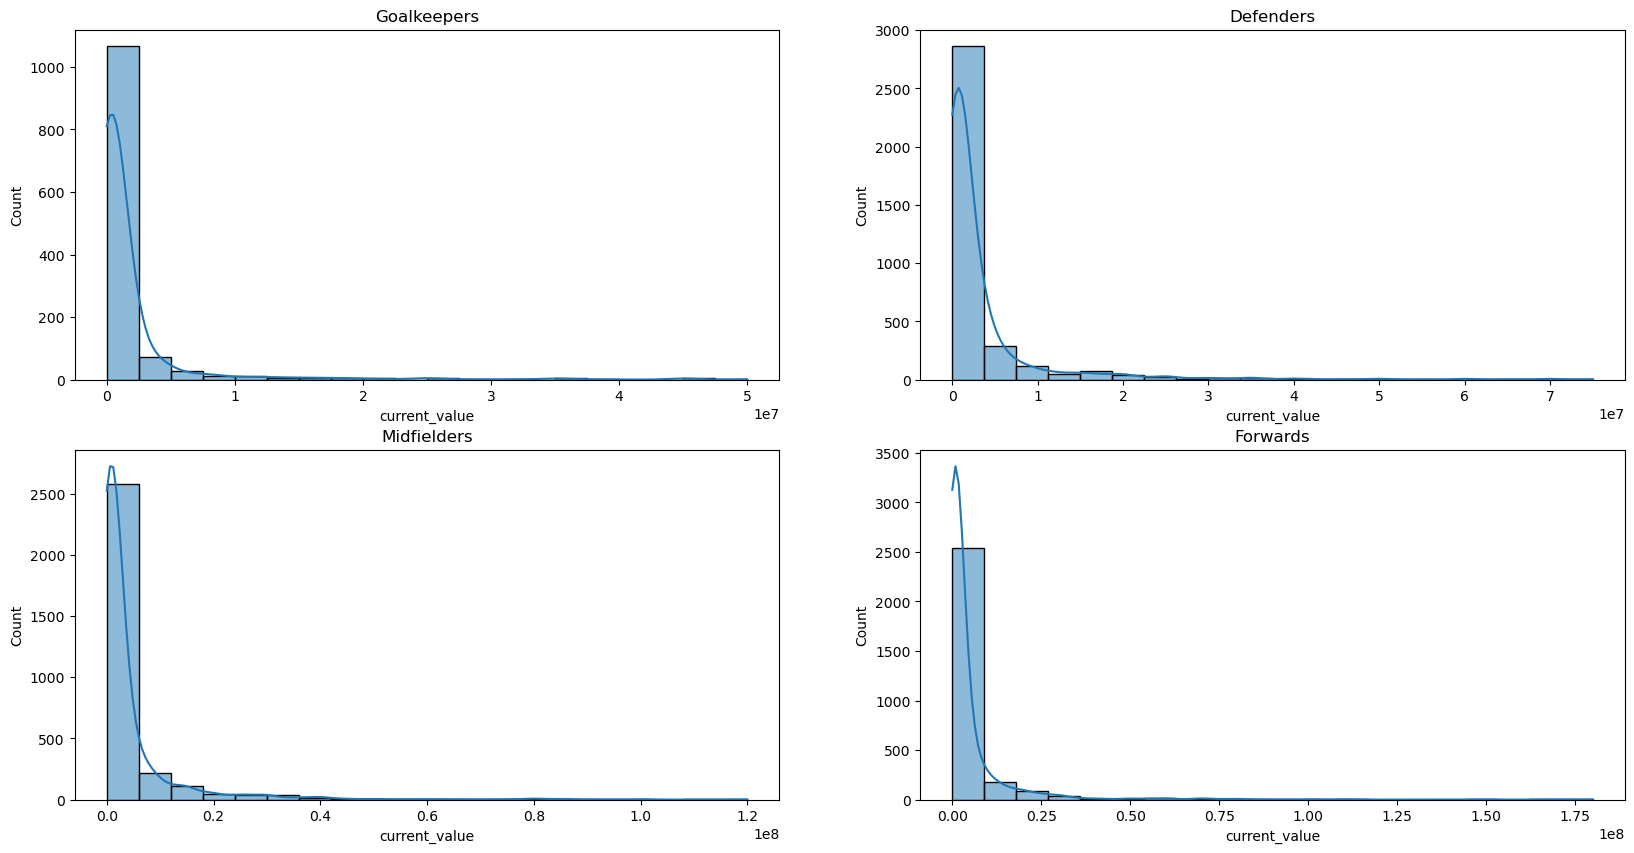

In [135]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(data=df_gk['current_value'], bins=20, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Goalkeepers')
sns.histplot(data=df_def['current_value'], bins=20, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Defenders')
sns.histplot(data=df_mid['current_value'], bins=20, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Midfielders')
sns.histplot(data=df_fwd['current_value'], bins=20, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Forwards')

Judging by the graphs above, we will split the prices into 3 categories: low, medium, and high. We will use the following thresholds:

For goalkeepers:
- Low: 0-2500000
- Medium: 2500000-10000000
- High: 10000000+

For defenders:
- Low: 0-10000000
- Medium: 10000000-20000000
- High: 20000000+

For midfielders:
- Low: 0-10000000
- Medium: 10000000-20000000
- High: 40000000+

For forwards:
- Low: 0-12500000
- Medium: 12500000-30000000
- High: 30000000+

In [136]:
bins_goalkeepers = [0, 2500000, 10000000, float('inf')]
bins_defenders = [0, 10000000, 20000000, float('inf')]
bins_midfielders = [0, 10000000, 20000000, float('inf')]
bins_forwards = [0, 12500000, 50000000, float('inf')]

labels = ['Low', 'Medium', 'High']

In [137]:
df_gk['value_category'] = pd.cut(df_gk['current_value'], bins=bins_goalkeepers, labels=labels, right=False)
df_def['value_category'] = pd.cut(df_def['current_value'], bins=bins_defenders, labels=labels, right=False)
df_mid['value_category'] = pd.cut(df_mid['current_value'], bins=bins_midfielders, labels=labels, right=False)
df_fwd['value_category'] = pd.cut(df_fwd['current_value'], bins=bins_forwards, labels=labels, right=False)


In [138]:
df_gk.drop('current_value', axis=1, inplace=True)
df_def.drop('current_value', axis=1, inplace=True)
df_mid.drop('current_value', axis=1, inplace=True)
df_fwd.drop('current_value', axis=1, inplace=True)

In [139]:
df_gk['value_category'].value_counts(), df_def['value_category'].value_counts(), df_mid['value_category'].value_counts(), df_fwd['value_category'].value_counts()

(Low       1066
 Medium     113
 High        49
 Name: value_category, dtype: int64,
 Low       3227
 Medium     160
 High       141
 Name: value_category, dtype: int64,
 Low       2769
 Medium     163
 High       159
 Name: value_category, dtype: int64,
 Low       2655
 Medium     203
 High        43
 Name: value_category, dtype: int64)

In [140]:
encoder = LabelEncoder()
df_gk['value_category_encoded'] = encoder.fit_transform(df_gk['value_category'])  
df_def['value_category_encoded'] = encoder.fit_transform(df_def['value_category'])
df_mid['value_category_encoded'] = encoder.fit_transform(df_mid['value_category'])
df_fwd['value_category_encoded'] = encoder.fit_transform(df_fwd['value_category'])

In [141]:
correlation_gk = df_gk.corr()
print(correlation_gk['value_category_encoded'].sort_values(ascending=False))

value_category_encoded         1.000
team_CA Osasuna                0.107
team_RCD Espanyol Barcelona    0.085
team_SC Freiburg               0.085
days_injured                   0.074
                               ...  
clean sheets                  -0.056
team_FK Krasnodar             -0.062
team_Real Sociedad            -0.062
highest_value                 -0.209
assists                          NaN
Name: value_category_encoded, Length: 388, dtype: float64


In [142]:
correlation_def = df_def.corr()
print(correlation_def['value_category_encoded'].sort_values(ascending=False))

value_category_encoded      1.000
team_Fulham FC              0.081
team_Everton FC             0.072
team_Sevilla FC             0.060
team_Olympique Marseille    0.060
                            ...  
team_Arsenal FC            -0.123
team_Chelsea FC            -0.129
highest_value              -0.245
clean sheets                  NaN
goals conceded                NaN
Name: value_category_encoded, Length: 388, dtype: float64


In [143]:
correlation_mid = df_mid.corr()
print(correlation_mid['value_category_encoded'].sort_values(ascending=False))

value_category_encoded      1.000
team_Olympique Marseille    0.079
team_LOSC Lille             0.068
team_Liverpool FC           0.067
team_AFC Bournemouth        0.063
                            ...  
team_Arsenal FC            -0.127
team_Chelsea FC            -0.130
highest_value              -0.272
clean sheets                  NaN
goals conceded                NaN
Name: value_category_encoded, Length: 388, dtype: float64


In [144]:
correlation_fwd = df_fwd.corr()
print(correlation_fwd['value_category_encoded'].sort_values(ascending=False))

value_category_encoded     1.000
appearance                 0.202
goals                      0.168
assists                    0.146
team_Atlético de Madrid    0.137
                           ...  
team_Tottenham Hotspur    -0.088
team_Manchester City      -0.095
team_Liverpool FC         -0.115
clean sheets                 NaN
goals conceded               NaN
Name: value_category_encoded, Length: 388, dtype: float64


In [145]:
threshold = 0.1

selected_features_gk = correlation_gk.index[abs(correlation_def['value_category_encoded']) > threshold]
selected_features_def = correlation_def.index[abs(correlation_def['value_category_encoded']) > threshold]
selected_features_mid = correlation_mid.index[abs(correlation_mid['value_category_encoded']) > threshold]
selected_features_fwd = correlation_fwd.index[abs(correlation_fwd['value_category_encoded']) > threshold]

selected_features_gk, selected_features_def, selected_features_mid, selected_features_fwd

(Index(['highest_value', 'team_Arsenal FC', 'team_Bayer 04 Leverkusen',
        'team_Bayern Munich', 'team_Chelsea FC', 'team_Tottenham Hotspur',
        'value_category_encoded'],
       dtype='object'),
 Index(['highest_value', 'team_Arsenal FC', 'team_Bayer 04 Leverkusen',
        'team_Bayern Munich', 'team_Chelsea FC', 'team_Tottenham Hotspur',
        'value_category_encoded'],
       dtype='object'),
 Index(['highest_value', 'assists', 'team_Arsenal FC', 'team_Chelsea FC',
        'team_Leicester City', 'value_category_encoded'],
       dtype='object'),
 Index(['appearance', 'highest_value', 'goals', 'assists', 'yellow cards',
        'team_Aston Villa', 'team_Atlético de Madrid', 'team_Borussia Dortmund',
        'team_Leicester City', 'team_Liverpool FC', 'team_Villarreal CF',
        'team_West Ham United', 'value_category_encoded'],
       dtype='object'))

In [146]:
df_gk = df_gk[selected_features_gk]
df_def = df_def[selected_features_def]
df_mid = df_mid[selected_features_mid]
df_fwd = df_fwd[selected_features_fwd]

In [147]:
df_fwd.head()

,appearance,highest_value,goals,assists,yellow cards,team_Aston Villa,team_Atlético de Madrid,team_Borussia Dortmund,team_Leicester City,team_Liverpool FC,team_Villarreal CF,team_West Ham United,value_category_encoded
23,88,85000000,35.000,13.000,5.000,0,0,0,0,0,0,0,0
24,79,130000000,12.000,6.000,0.000,0,0,0,0,0,0,0,0
25,63,25000000,8.000,7.000,1.000,0,0,0,0,0,0,0,2
26,72,25000000,21.000,12.000,9.000,0,0,0,0,0,0,0,2
27,80,75000000,22.000,15.000,12.000,0,0,0,0,0,0,0,0


## Data Preparation:

In [148]:
X_gk = df_gk.drop('value_category_encoded', axis=1)
y_gk = df_gk['value_category_encoded']

X_def = df_def.drop('value_category_encoded', axis=1)
y_def = df_def['value_category_encoded']

X_mid = df_mid.drop('value_category_encoded', axis=1)
y_mid = df_mid['value_category_encoded']

X_fwd = df_fwd.drop('value_category_encoded', axis=1)
y_fwd = df_fwd['value_category_encoded']

X_train_gk, X_test_gk, y_train_gk, y_test_gk = train_test_split(X_gk, y_gk, test_size=0.2, random_state=42)
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X_def, y_def, test_size=0.2, random_state=42)
X_train_mid, X_test_mid, y_train_mid, y_test_mid = train_test_split(X_mid, y_mid, test_size=0.2, random_state=42)
X_train_fwd, X_test_fwd, y_train_fwd, y_test_fwd = train_test_split(X_fwd, y_fwd, test_size=0.2, random_state=42)

# Model Building:

In [149]:
model_gk_dt = DecisionTreeClassifier()
model_def_dt = DecisionTreeClassifier()
model_mid_dt = DecisionTreeClassifier()
model_fwd_dt = DecisionTreeClassifier()

model_gk_rf = RandomForestClassifier()
model_def_rf = RandomForestClassifier()
model_mid_rf = RandomForestClassifier()
model_fwd_rf = RandomForestClassifier()

In [150]:
param_grid_gk = {
    'max_depth': [7],
    'n_estimators': [50]
}

param_grid_def = {
    'max_depth': [11],
    'n_estimators': [50]
}

param_grid_mid = {
    'max_depth': [7],
    'n_estimators': [27]
}

param_grid_fwd = {
    'max_depth': [17],
    'n_estimators': [70]
}

grid_search_gk = GridSearchCV(estimator=model_gk_rf, param_grid=param_grid_gk, cv=5,
                              scoring='f1_macro', verbose=1)

grid_search_def = GridSearchCV(estimator=model_def_rf, param_grid=param_grid_def, cv=5,
                                scoring='f1_macro', verbose=1)

grid_search_mid = GridSearchCV(estimator=model_mid_rf, param_grid=param_grid_mid, cv=5,
                                scoring='f1_macro', verbose=1)

grid_search_fwd = GridSearchCV(estimator=model_fwd_rf, param_grid=param_grid_fwd, cv=5,
                                scoring='f1_macro', verbose=1)

## Model Training:

In [151]:
model_gk_rf.fit(X_train_gk, y_train_gk)
model_def_rf.fit(X_train_def, y_train_def)
model_mid_rf.fit(X_train_mid, y_train_mid)
model_fwd_rf.fit(X_train_fwd, y_train_fwd)

RandomForestClassifier()

In [152]:
model_gk_dt.fit(X_train_gk, y_train_gk)
model_def_dt.fit(X_train_def, y_train_def)
model_mid_dt.fit(X_train_mid, y_train_mid)
model_fwd_dt.fit(X_train_fwd, y_train_fwd)

DecisionTreeClassifier()

In [153]:
grid_search_gk.fit(X_train_gk, y_train_gk)
grid_search_def.fit(X_train_def, y_train_def)
grid_search_mid.fit(X_train_mid, y_train_mid)
grid_search_fwd.fit(X_train_fwd, y_train_fwd)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [17], 'n_estimators': [70]},
             scoring='f1_macro', verbose=1)

In [154]:
grid_search_gk.best_params_, grid_search_def.best_params_, grid_search_mid.best_params_, grid_search_fwd.best_params_

({'max_depth': 7, 'n_estimators': 50},
 {'max_depth': 11, 'n_estimators': 50},
 {'max_depth': 7, 'n_estimators': 27},
 {'max_depth': 17, 'n_estimators': 70})

In [155]:
best_model_gk_rf = grid_search_gk.best_estimator_
best_model_def_rf = grid_search_def.best_estimator_
best_model_mid_rf = grid_search_mid.best_estimator_
best_model_fwd_rf = grid_search_fwd.best_estimator_

## Model Testing:

In [156]:
y_pred_gk_dt = model_gk_dt.predict(X_test_gk)
y_pred_def_dt = model_def_dt.predict(X_test_def)
y_pred_mid_dt = model_mid_dt.predict(X_test_mid)
y_pred_fwd_dt = model_fwd_dt.predict(X_test_fwd)

In [157]:
y_pred_gk_rf = model_gk_rf.predict(X_test_gk)
y_pred_def_rf = model_def_rf.predict(X_test_def)
y_pred_mid_rf = model_mid_rf.predict(X_test_mid)
y_pred_fwd_rf = model_fwd_rf.predict(X_test_fwd)

In [158]:
y_pred_gk_rf_best = best_model_gk_rf.predict(X_test_gk)
y_pred_def_rf_best = best_model_def_rf.predict(X_test_def)
y_pred_mid_rf_best = best_model_mid_rf.predict(X_test_mid)
y_pred_fwd_rf_best = best_model_fwd_rf.predict(X_test_fwd)

# Model Evaluation:

### Base Model:

In [159]:
base_model_gk = round(df_gk['value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model_def = round(df_def['value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model_mid = round(df_mid['value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model_fwd = round(df_fwd['value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)

base_model_gk, base_model_def, base_model_mid, base_model_fwd

(9.92, 30.02, 25.76, 24.7)

### Accuracy:  

In [160]:
accuracy_gk_dt = accuracy_score(y_test_gk, y_pred_gk_dt)
accuracy_def_dt = accuracy_score(y_test_def, y_pred_def_dt)
accuracy_mid_dt = accuracy_score(y_test_mid, y_pred_mid_dt)
accuracy_fwd_dt = accuracy_score(y_test_fwd, y_pred_fwd_dt)

accuracy_gk_dt, accuracy_def_dt, accuracy_mid_dt, accuracy_fwd_dt

(0.9105691056910569, 0.9305949008498584, 0.9046849757673667, 0.927710843373494)

In [161]:
y_pred_train_gk_dt = model_gk_dt.predict(X_train_gk)
y_pred_train_def_dt = model_def_dt.predict(X_train_def)
y_pred_train_mid_dt = model_mid_dt.predict(X_train_mid)
y_pred_train_fwd_dt = model_fwd_dt.predict(X_train_fwd)

accuracy_train_gk_dt = accuracy_score(y_train_gk, y_pred_train_gk_dt)
accuracy_train_def_dt = accuracy_score(y_train_def, y_pred_train_def_dt)
accuracy_train_mid_dt = accuracy_score(y_train_mid, y_pred_train_mid_dt)
accuracy_train_fwd_dt = accuracy_score(y_train_fwd, y_pred_train_fwd_dt)

accuracy_train_gk_dt, accuracy_train_def_dt, accuracy_train_mid_dt, accuracy_train_fwd_dt

(0.9195519348268839, 0.9468462083628633, 0.9716828478964401, 1.0)

In [162]:
accuracy_gk_rf = accuracy_score(y_test_gk, y_pred_gk_rf)
accuracy_def_rf = accuracy_score(y_test_def, y_pred_def_rf)
accuracy_mid_rf = accuracy_score(y_test_mid, y_pred_mid_rf)
accuracy_fwd_rf = accuracy_score(y_test_fwd, y_pred_fwd_rf)

accuracy_gk_rf, accuracy_def_rf, accuracy_mid_rf, accuracy_fwd_rf

(0.8983739837398373, 0.93342776203966, 0.9079159935379645, 0.9328743545611016)

In [163]:
accuracy_gk_rf = accuracy_score(y_test_gk, y_pred_gk_rf_best)
accuracy_def_rf = accuracy_score(y_test_def, y_pred_def_rf_best)
accuracy_mid_rf = accuracy_score(y_test_mid, y_pred_mid_rf_best)
accuracy_fwd_rf = accuracy_score(y_test_fwd, y_pred_fwd_rf_best)

accuracy_gk_rf, accuracy_def_rf, accuracy_mid_rf, accuracy_fwd_rf

(0.8943089430894309,
 0.9291784702549575,
 0.9063004846526656,
 0.9328743545611016)

### Confusion Matrix:

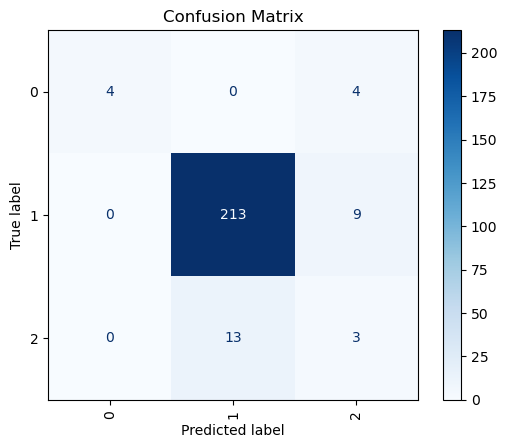

In [164]:
ConfusionMatrixDisplay.from_predictions(y_test_gk, y_pred_gk_rf_best,
                                        display_labels=best_model_gk_rf.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

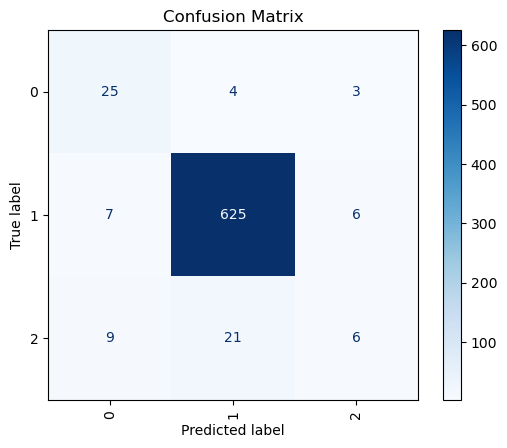

In [165]:
ConfusionMatrixDisplay.from_predictions(y_test_def, y_pred_def_rf_best,
                                        display_labels=best_model_def_rf.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

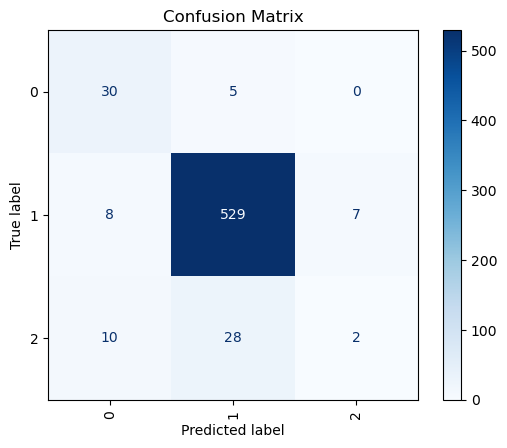

In [166]:
ConfusionMatrixDisplay.from_predictions(y_test_mid, y_pred_mid_rf_best,
                                        display_labels=best_model_mid_rf.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

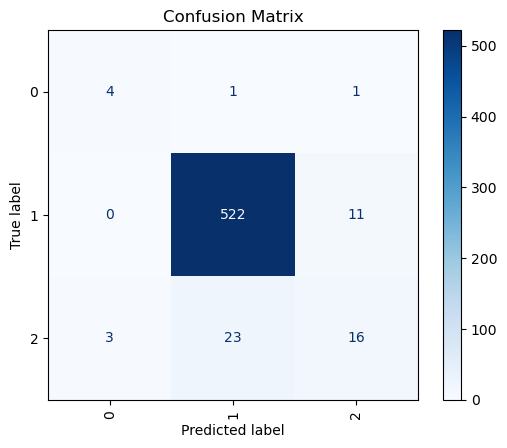

In [167]:
ConfusionMatrixDisplay.from_predictions(y_test_fwd, y_pred_fwd_rf_best,
                                        display_labels=best_model_fwd_rf.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

### Percision:

In [168]:
percision_gk = precision_score(y_test_gk, y_pred_gk_rf_best, average='weighted')
percision_def = precision_score(y_test_def, y_pred_def_rf_best, average='weighted')
percision_mid = precision_score(y_test_mid, y_pred_mid_rf_best, average='weighted')
percision_fwd = precision_score(y_test_fwd, y_pred_fwd_rf_best, average='weighted')

percision_gk, percision_def, percision_mid, percision_fwd

(0.895244262177135, 0.9169599625828465, 0.8769318713904174, 0.9242685025817556)

### Recall:

In [169]:
recall_gk = recall_score(y_test_gk, y_pred_gk_rf_best, average='weighted')
recall_def = recall_score(y_test_def, y_pred_def_rf_best, average='weighted')
recall_mid = recall_score(y_test_mid, y_pred_mid_rf_best, average='weighted')
recall_fwd = recall_score(y_test_fwd, y_pred_fwd_rf_best, average='weighted')

recall_gk, recall_def, recall_mid, recall_fwd

(0.8943089430894309,
 0.9291784702549575,
 0.9063004846526656,
 0.9328743545611016)

### F1 Score:

In [170]:
f1_gk = f1_score(y_test_gk, y_pred_gk_rf_best, average='weighted')
f1_def = f1_score(y_test_def, y_pred_def_rf_best, average='weighted')
f1_mid = f1_score(y_test_mid, y_pred_mid_rf_best, average='weighted')
f1_fwd = f1_score(y_test_fwd, y_pred_fwd_rf_best, average='weighted')

f1_gk, f1_def, f1_mid, f1_fwd

(0.8919981610530392, 0.920064327320131, 0.8868450851159181, 0.9270277987363197)